# House Price Model Building
- In this section we can build a model.

# Import Packages

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Laod process data

In [127]:
df=pd.read_csv('house_clean.csv')
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.5,1340,7912.0,1.5,0,3,0,1955,2005,Shoreline,USA
1,1893340.0,5.0,2.5,3650,9050.0,2.0,4,5,280,1921,0,Seattle,USA
2,342000.0,3.0,2.0,1930,11947.0,1.0,0,4,0,1966,0,Kent,USA


<Axes: >

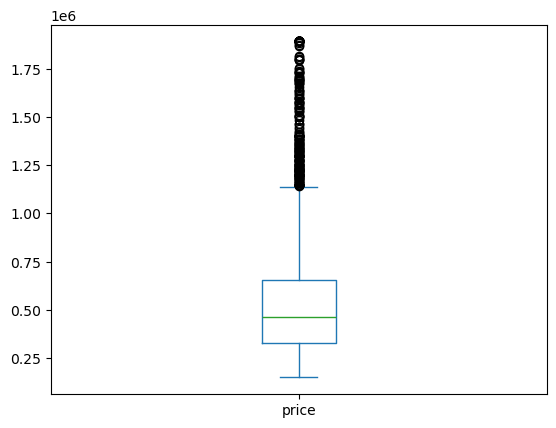

In [128]:
df['price'].plot(kind='box')

# Key Point
- After EDA we see that we can apply the winserization technique b/c data contain outliers.
- Also apply the log transform

<Axes: ylabel='Density'>

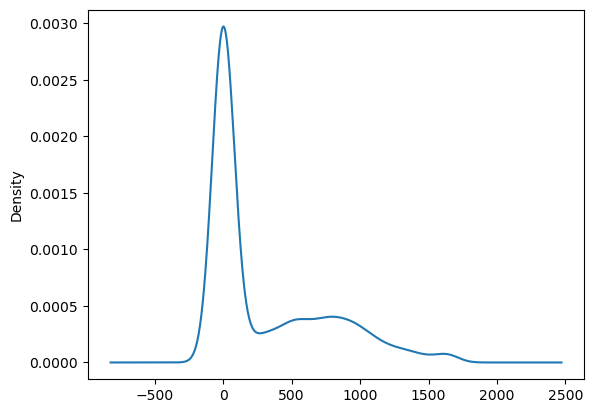

In [129]:
df['sqft_basement'].plot(kind='kde')

# Train test split

In [130]:
from sklearn.model_selection import train_test_split

# saperatet the feature and label

In [131]:
feature=df.drop(columns=['price'])
label=df['price']

In [132]:
feature

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,city,country
0,3.0,1.50,1340,7912.0,1.5,0,3,0,1955,2005,Shoreline,USA
1,5.0,2.50,3650,9050.0,2.0,4,5,280,1921,0,Seattle,USA
2,3.0,2.00,1930,11947.0,1.0,0,4,0,1966,0,Kent,USA
3,3.0,2.25,2000,8030.0,1.0,0,4,1000,1963,0,Bellevue,USA
4,4.0,2.50,1940,10500.0,1.0,0,4,800,1976,1992,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,3.0,1.75,1510,6360.0,1.0,0,4,0,1954,1979,Seattle,USA
4517,3.0,2.50,1460,7573.0,2.0,0,3,0,1983,2009,Bellevue,USA
4518,3.0,2.50,3010,7014.0,2.0,0,3,0,2009,0,Renton,USA
4519,4.0,2.00,2090,6630.0,1.0,0,3,1020,1974,0,Seattle,USA


In [133]:
label

0       3.130000e+05
1       1.893340e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4516    3.081667e+05
4517    5.343333e+05
4518    4.169042e+05
4519    2.034000e+05
4520    2.206000e+05
Name: price, Length: 4521, dtype: float64

In [134]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=42)

In [135]:
x_train.shape

(3616, 12)

In [136]:
x_test.shape

(905, 12)

# Saperate the numeical and categorical col

In [137]:
num_col=feature.select_dtypes("number").columns
cat_col=feature.select_dtypes("object").columns

In [138]:
num_col

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [139]:
cat_col

Index(['city', 'country'], dtype='object')

# Building pipeline

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

### Numerical Pipeline 

In [141]:
num_pipe=Pipeline(steps=[
    ("impute",SimpleImputer(strategy='median')),
    ("Fun_transform",FunctionTransformer(func=np.log1p)),
    ("Scale",StandardScaler())
])
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('Fun_transform', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('Scale', StandardScaler())])

### Cat_pipe 

In [142]:
cat_pipe=Pipeline(steps=[
    ("impute",SimpleImputer(strategy='most_frequent')),
    ("encode",OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'))
])
cat_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('encode',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse=False))])

# Building  Transformer

In [143]:
from sklearn.compose import ColumnTransformer

In [144]:
process=ColumnTransformer(transformers=[
    ("cat_transform",cat_pipe,cat_col),
    ("num_transfomr",num_pipe,num_col)
],remainder='passthrough')
process

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_transform',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['city', 'country'], dtype='object')),
                                ('num_transfomr',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('Fun_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('Scale', StandardScaler())]),
                                 Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object'))])

# Final Pipeline

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [146]:
models={
    "LinearRegression":LinearRegression(),
    "DecessionTree":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(),
    "Xgboost":XGBRegressor()
}

# Evulation matrcix

In [147]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [148]:
def evulation(y_test,pre,x_test):
    mae=mean_absolute_error(y_test,pre)
    mse=mean_squared_error(y_test,pre)
    r2=r2_score(y_test,pre)
    
    adjusted_r2=(1-((r2**2)*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1))
    
    dic={
        'MAE':mae,
        "MSE":mse,
        "R2-Score":r2,
        'Adjusted':adjusted_r2
    }
    return dic

# Fit the models

In [161]:
final=Pipeline(steps=[
            ("Process",process),
            ('model',RandomForestRegressor())
])
final

Pipeline(steps=[('Process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['city', 'country'], dtype='object')),
                                                 ('num_transfomr',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Fun_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [162]:
final.fit(x_train,y_train)

Pipeline(steps=[('Process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transform',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['city', 'country'], dtype='object')),
                                                 ('num_transfomr',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Fun_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object'))])),
                ('model', RandomForestRegressor())])

In [163]:
pre=final.predict(x_test)

In [164]:
r2_score(y_test,pre)

0.6229640373718366